# Met Office Climate Data Hackathon

_This notebook was originally written by Dr Fai Fung at the UK Met Office._
_His version is available at <https://github.com/COP26-Hackathon/Met-Office-Climate-Data-Challenge-March_2021>_

## Using xclim with UK Climate Projections data

This notebook shows you how to work with the UK Climate Projections netCDF files available on the CEDA Archive 
using the xarray Python library. It demonstrates:
 * the capability of the xclim Python package
 * using xarray-extras to change the format of (a suset of) the data 

This module requires the following:

*  Python packages in your environment 
 * xarray
 * xclim 
 * xarray-extras
 * cartopy
 * numpy
 * matplotlib
 
* UKCP data files
 * daily maximum surface air temperatures (available from CEDA Archive [here](http://data.ceda.ac.uk/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/tasmax/day/latest))

## Preparatory actions
Load packages

In [2]:
import xclim
import xarray as xr
import xarray_extras
import numpy as np
import matplotlib.pyplot as plt

Assign file locations

In [3]:
UKCP_FILE_DIRECTORY_TASMAX =  '~/UKCP18/day'

Load UKCP data to work with

In [4]:
path=UKCP_FILE_DIRECTORY_TASMAX
fi='/tasmax_*.nc'
tasmax_ds=xr.open_mfdataset(path+fi)
tasmax_da=tasmax_ds.tasmax.sel(time=slice('1980','2050'))

In [5]:
print('indices')
dir(xclim.indices)

indices


['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_anuclim',
 '_conversion',
 '_hydrology',
 '_multivariate',
 '_simple',
 '_threshold',
 'base_flow_index',
 'blowing_snow',
 'cold_and_dry_days',
 'cold_spell_days',
 'cold_spell_duration_index',
 'cold_spell_frequency',
 'continuous_snow_cover_end',
 'continuous_snow_cover_start',
 'cooling_degree_days',
 'daily_freezethaw_cycles',
 'daily_pr_intensity',
 'daily_temperature_range',
 'daily_temperature_range_variability',
 'days_over_precip_thresh',
 'days_with_snow',
 'degree_days_exceedance_date',
 'drought_code',
 'dry_days',
 'extreme_temperature_range',
 'fire_season',
 'fire_weather_indexes',
 'first_day_above',
 'first_day_below',
 'first_snowfall',
 'fraction_over_precip_thresh',
 'freshet_start',
 'frost_days',
 'frost_season_length',
 'fwi',
 'generic',
 'growing_degree_days',
 'growing_season_end',
 'growing_season_length',
 'heat_wave_frequency',


Calculate tropical night index with threshold of 25C and present results on annual time-scale

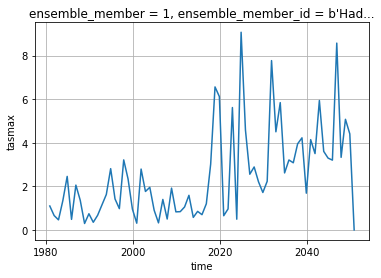

In [10]:
trop_n=xclim.indices.tropical_nights(tasmax_da,thresh='25 C', freq='AS-DEC')
trop_n_m=trop_n.mean(dim=['projection_y_coordinate','projection_x_coordinate'])
trop_n_m.plot()
plt.grid() #note default y-axis is irrelevant

Find and plot hottest day of the year

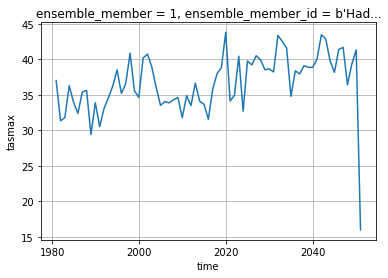

In [11]:
tx_max=xclim.indices.tx_max(tasmax_da, freq='AS-DEC')
tx_max_m=tx_max.max(dim=['projection_y_coordinate','projection_x_coordinate'])
tx_max_m.plot()
plt.grid() #note default y-axis is irrelevant

Why is the final value so low? 

It's because the year has only December in it. We could recalculate with only full years.

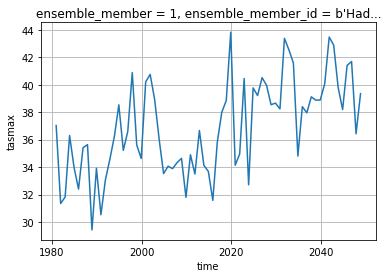

In [12]:
tasmax_da=tasmax_ds.tasmax.sel(time=slice('1979-12','2049-11'))
tx_max=xclim.indices.tx_max(tasmax_da, freq='AS-DEC')
tx_max_m=tx_max.max(dim=['projection_y_coordinate','projection_x_coordinate'])
tx_max_m.plot()
plt.grid() #note default y-axis is irrelevant

# Lets now output as a csv file

We'll pick the average annual maximum temperature in the 2040s. We'll plot it and output it.

First let's look at the data array. It's now chunked into the 69 different years...

In [14]:
tx_max

<xarray.DataArray 'tasmax' (ensemble_member: 1, time: 69, projection_y_coordinate: 112, projection_x_coordinate: 82)>
dask.array<transpose, shape=(1, 69, 112, 82), dtype=float32, chunksize=(1, 1, 112, 82), chunktype=numpy.ndarray>
Coordinates:
  * time                     (time) object 1980-12-01 00:00:00 ... 2048-12-01...
  * ensemble_member          (ensemble_member) int32 1
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    ensemble_member_id       (ensemble_member) |S27 dask.array<chunksize=(1,), meta=np.ndarray>
    grid_latitude            (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(112, 82), meta=np.ndarray>
    grid_longitude           (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(112, 82), meta=np.ndarray>
Attributes:
    standard_name:  air_temperature
    long_name:      Maximum air temperature
    units:          °C
    description:    Maximum air temperature
    label_units:    °C
    plot_label:     Maximum air temperature at 1.5m (°C)
    cell_methods:   time: mean
    grid_mapping:   transverse_mercator

In [27]:
tx_max_2040s=tx_max.sel(time=slice('2040-01','2049-11'))
tx_max_mean=tx_max_2040s.mean(dim=['time']).squeeze() #bring it down to a 2D field
tx_max_mean

<xarray.DataArray 'tasmax' (projection_y_coordinate: 112, projection_x_coordinate: 82)>
dask.array<getitem, shape=(112, 82), dtype=float32, chunksize=(112, 82), chunktype=numpy.ndarray>
Coordinates:
    ensemble_member          int32 1
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    ensemble_member_id       |S27 dask.array<chunksize=(), meta=np.ndarray>
    grid_latitude            (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(112, 82), meta=np.ndarray>
    grid_longitude           (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(112, 82), meta=np.ndarray>

**Lets plot that value on a map.**
Ocean damps surface temperatures, so mask them out

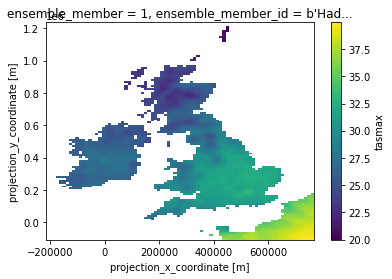

In [28]:
mask=xr.open_dataset('~/UKCP18/ukcp-other/land-sea_mask_uk_12km.nc')
tx_max_mean_lnd=tx_max_mean.where(mask.lsm>0) #actually apply the land-sea mask (called lsm)
tx_max_mean_lnd.plot()

### Now output this 2D field to a csv file

In [33]:
tx_max_mean_lnd.to_pandas().to_csv("~/tx_max_2040s_lnd.csv")